# 과제 1   
    1. 시그모이드, ReLU 외에 다른 활성화함수 찾아서 구현   
    2. 어떤 데에 응용해볼 수 있을지도 한번 생각해보기   
    3. matplot 이용해서 함수 그래프랑 미분된 그래프 그려보기

> <a href = "https://m.blog.naver.com/PostView.naver?isHttpsRedirect=true&blogId=handuelly&logNo=221824080339">딥러닝 - 활성화 함수 참조</a>   
><a href = "https://ganghee-lee.tistory.com/32">활성화 함수 종류</a>   
><a href = "https://machinelearningmastery.com/choose-an-activation-function-for-deep-learning/">How to Choose an Output Activation Function</a>   
><a href = "https://towardsdatascience.com/everything-you-need-to-know-about-activation-functions-in-deep-learning-models-84ba9f82c253">Very Useful information about activation function</a>   

<b>활성화 함수와 관련한 몇 가지 용어들</b>   
1. Back-propagation   
    Chaing rule에 의해서 기울기를 역으로 계산하면서 오차에 대한 weight 값의 영향력에 비례해서 이를 수정한다.   
2. Vanishing Gradient Problem   
    딥 러닝에서 학습을 위해 Back-propagation을 계산하는 과정에서 신경망이 깊어질 때 누적으로 곱해진 값들이 0으로 수렴하게 되어 가중치 영향력을 비교하기가 힘들어지는 현상   
3. <a href="https://brunch.co.kr/@kdh7575070/27">Dying ReLU</a>   
    ReLU는 음수값을 0으로 사용하는 데 propagtaion 과정에서 이런 특성 때문에 노드 값이 죽어버리는 현상   
### 활성화 함수의 종류   
* Sigmoid Function   
    시그모이드 함수는 음수 값을 0에 가깝게 표현하기 때문에 입력 값이 최종 레이어에서 미치는 영향이 적어지는  x의 절대값이 커질수록 미분 값이 소실될 가능성이 큰 단점이 있다.   
    $ sigmoid(x) = {1 \over 1 + e^{-x}} \\
    {d \over dx} sigmoid(x) = sigmoid(x)(1-sigmoid(x))$   
* Tanh Function   
    Sigmoid Function을 개량한 함수로 중심점을 0으로 옮겨 최적화 과정이 느려지는 문제를 해결했다. 하지만 Vanishing Gradient Problem은 아직 남아있다.   
    $ tanh(x) = 2\sigma (2x) - 1\\
    tanh(x) = {e^x - e^{-x} \over {e^x + e^{-x}}} \\
    tanh'(x) = 1 - tanh^2(x) $   
* ReLU   
    $ f(x) = max(0, x) $   
* Leaky ReLU   
    Dying ReLU를 해결하기 위한 함수. 0을 피하기 위해 매우 작은수 s를 곱한다.   
    $ f(x) = max(sx, x) $   
* PReLU   
    Leaky ReLU와 거의 유사하지만 작은 수 $s$가 아닌 새로운 파라미터 $\alpha$를 추가해서 계산한다.   
    $f(x) = max(\alpha x, x)$   
* ELU   
    출력 값이 거의 zero-centerd에 가까우며 일반적인 ReLU와 다르게 exp 함수를 계산하는 비용이 발생한다.   
    $
    f(x) = x \qquad if \qquad x>0 \\
    f(x) = \alpha (e^x - 1) \qquad if \qquad x<= 0 
    $   
* Maxout    
    $ f(x) = max(w_1^Tx + b_1, w_2^Tx+b_2) $   

In [13]:
import numpy as np

def Tanh(x): #Hyperbolic Tangent
    return (np.exp(x) - np.exp(-x)) / (np.exp(x)+(np.exp(-x)))

def LReLU(x, a = 0.01):
    return np.maximum(x*a, x)

def PReLU(x, a = 0.01):
    return np.maximum(x*a, x)

def ELU(x, a = 0.01):
    return (x>0)*x + (x<=0)*(a*(np.exp(x)-1))

#### 응용의 관점에서 생각해본다면..?   
Think about applications of activation function.   
1. <b>실생활에서의 활성화 함수를 쓰는 곳이 있을까?</b>   
    위의 활성화 함수를 사용하는 것은 아니지만 저역필터(low pass filter)나 고역필터(high pass filter)같은 경우 특정 출력 전압만을 내보낸다는 점에서 활성화 함수와 비슷하다고 할 수 있을 듯.   
2. <b>딥러닝에서 활성화 함수를 응용의 관점에서 생각한다면?</b>   
    비선형의 모델을 만드는데에 사용되는 것(?)   
    어떤 것을 의미하는지 잘 모르겠다.   

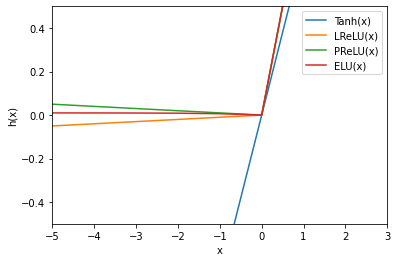

In [3]:
import matplotlib.pyplot as pl
#graph of activation functions 
pl.xlabel('x')
pl.ylabel('h(x)')
x = np.arange(-5, 5)

pl.plot(x, Tanh(x), label="Tanh(x)")
pl.plot(x, LReLU(x), label="LReLU(x)")
pl.plot(x, PReLU(x, -0.01), label="PReLU(x)")
pl.plot(x, ELU(x, -0.01), label="ELU(x)")
pl.axis([-5, 3, -0.5, 0.5])
pl.legend()
pl.show()

### 미분함수 만들기   

$$
\lim_{h \rightarrow 0}{f(x+h) - f(x) \over h}
$$

In [5]:
def gradient(f, x):
    #미분 함수
    h = 0.00000001
    return (f(x+h) - f(x))/h

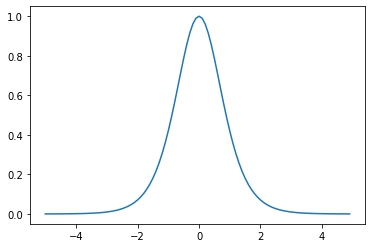

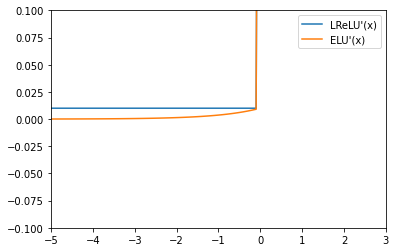

In [20]:
x = np.arange(-5, 5, 0.1)
y1 = gradient(Tanh, x)
pl.plot(x, y1)
pl.show()
#Graph of Gradient Tanh function 

y2 = gradient(LReLU, x)
y3 = gradient(ELU, x)
pl.plot(x, y2, label="LReLU'(x)")
pl.plot(x, y3, label="ELU'(x)")
pl.axis([-5, 3, -0.1, 0.1])
pl.legend()
pl.show()

ELU'(x)와 LReLU'(x)의 그래프 개형을 보면 exp를 계산해야 하는 ELU가 더욱 완만하게 꺾이는 것을 알 수 있다.

# 과제 2   
    MNIST 과정을 손으로 그려보기
        1. 계층의 개수, 노드 가중치는 세개까지 그려볼 것
        2. 행렬 곱셈으로 표현해보기
        3. 최대한 구체적으로

> 참고   
> <a href = "https://tensorflowkorea.gitbooks.io/tensorflow-kr/content/g3doc/tutorials/mnist/beginners/">Tensorflow Document</a>

### MNIST   
<i>MNIST란?</i>   
컴퓨터 비전 데이터셋   
데이터셋은 다음과 같이 나뉜다.   
1. 학습 데이터(train)   
2. 테스트 데이터(test)   
3. 검증 데이터(validation)   

챕터 3에서 get_data()함수를 살펴보자.   
```Python
def get_data():
    (x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, flatten=True, one_hot_label=False)
    return x_test, t_test
```    
| 이름 | 데이터 종류 |
| -- | -- |
| x_train | 학습용 이미지 |
| t_train | 학습용 레이블 |
| x_test | 테스트 데이터 |
| t_test | 검증 데이터 |   

MNIST에서는 이미지 데이터를 2차원 배열로 생각한다. 그래서 이 배열을 펼쳐서 하나하나의 원소를 벡터로 생각한다.   
<img src = "https://tensorflowkorea.gitbooks.io/tensorflow-kr/content/g3doc/images/MNIST-Matrix.png" height = 150 width = 400>   
이를 28 x 28 = 784개의 벡터로 만든다. 만약에 다른 크기의 이미지 데이터가 있다면 픽셀 하나하나를 벡터로 만들 수 있다.(<b>flatten</b> 옵션값이 그것에 해당한다.)    
<b>one-hot-label</b>값을 True로 설정할 경우 t_test값이 n차원 벡터로 바뀐다.   
훈련과정은 MNIST에서 따로 다루지 않기 때문에 책에서 나온 순서대로 해보자.   
![homework1](ch3_homework1.png)   
좀 행렬로 표현해보자면 다음과 같다.    
![homework2](ch3_homework2.png)


# Chapter 4 - 신경망 학습 
---

### 학습
: 훈련 데이터로부터 가중치 매개변수의 최적값을 자동으로 흭득하는 것
<br>   
아래 단계로 갈수록 사람의 개입이 점점 작아진다.   
사람 : 경험과 직관(사람이 생각한 알고리즘)      
기계학습 : 수집한 데이터(사람이 생각한 특징 -> 기계학습)   
딥러닝 : 신경망(딥러닝)   

>오버피팅 : 한 데이터셋에만 지나치게 최적화된 상태   


### 손실 함수
: 최적의 매개변수를 탐색하는 지표(평균 제곱 오차 또는 교차 엔트로피 오차)   


$y_k$ : 신경망의 출력   
$t_k$ : 정답 레이블   
$k$ : 데이터의 차원 수(신경망 출력 값의 차원 수(?))   
#### 평균 제곱 오차
$E = {1 \over 2}\displaystyle\sum_k(y_k-t_k)^2$   
#### 교차 엔트로피 오차
$E= -\displaystyle\sum_k t_k \log y_k$   
$E = - {1 \over N}\displaystyle\sum _n \displaystyle\sum _k t_{nk}\log y_{nk} $   
훈련 데이터가 많아지면 많아질수록 위의 평균 손실함수 값을 구하는 시간이 점점 늘어난다. 그래서 이런 경우 데이터 일부를 추려 전체의 근사치로 이용하는 경우가 있다. 이런 방법을 <b>미니배치 학습</b>이라고 한다.

In [60]:
import numpy as np

def mean_squared_error(y, t):
    return 0.5 * np.sum((y-t)**2)

def cross_entropy_error(y, t):
    delta = 1e-7
    return -np.sum(t * np.log(y+delta))

t = [0,0,1,0,0,0,0,0,0,0]
y1 = [0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0]
y2 = [0.1, 0.05, 0.1, 0.0, 0.05, 0.1, 0.0, 0.6, 0.0, 0.0]

In [9]:
print("y1's MSE : ", mean_squared_error(np.array(y1), np.array(t)))
print("y2's MSE : ", mean_squared_error(np.array(y2), np.array(t)))
print("y1's CEE : ", cross_entropy_error(np.array(y1), np.array(t)))
print("y2's CEE : ", cross_entropy_error(np.array(y2), np.array(t)))

y1's MSE :  0.09750000000000003
y2's MSE :  0.5975
y1's CEE :  0.510825457099338
y2's CEE :  2.302584092994546


In [10]:
from locale import normalize
import sys, os
sys.path.append(os.pardir)
import numpy as np
from dataset.mnist import load_mnist

(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label=True)

print(x_train.shape)
print(t_train.shape)

(60000, 784)
(60000, 10)


In [18]:
train_size = x_train.shape[0]
batch_size = 10
batch_mask = np.random.choice(train_size, batch_size)
x_batch = x_train[batch_mask]
t_batch = t_train[batch_mask]
print(t_batch.shape)
print(batch_mask)

(10, 10)
[36669 53091 32729 35180 12327 17467 19883 35874  2421 21819]


In [1]:
#118p. if y.ndim == 1이 아니라 y.ndim != 1 이어야 하지 않나? 2차원 배열 이상일 때 1차원 배열로 펴주는 게 필요한 것이 아닌가?
#아니었음. 데이터가 하나라면 shape가 (x, )으로 표현되기 때문에 reshape로 (1, x)로 변경해 주는 것임
#만약 데이터가 1개 이상의 batch라면 (batch_size, x)로 표현되기 때문에 상관 X
#https://dazabamuker.tistory.com/5 이거 진짜 골때리네 ;;
def cross_entropy_error1(y, t): #one-hot-encoding True
    delta = 1e-7
    if y.ndim == 1:
        t = t.reshape(1, t.size)
        y = y.reshape(1, y.size)

    batch_size = y.shape[0]
    
    return -np.sum(t*np.log(y+delta)) / batch_size

def cross_entropy_error2(y, t):
    delta = 1e-7
    if y.ndim == 1:
        t = t.reshape(1, t.size)
        y = y.reshape(1, y.size)
    
    batch_size = y.shape[0]
    return -np.sum(np.log(y[np.arange(batch_size), t]+ delta)) / batch_size

# t = np.arange(0, 10)
# y = np.array([1, 3, 5, 7, 9, 0, 2, 4, 9, 8])
# print(cross_entropy_error2(y, t))


신경망 학습에서의 절대적 목표는 높은 정확도를 끌어내는 매개변수의 값을 찾는 것이다. 이 때에는 정확도가 아니라 손실함수를 지표로 삼는다.   
### 정확도를 지표로 삼으면 어떻게 될까?   
정확도는 매개변수의 미소한 변화에는 거의 반응을 보이지 않는다. 또한 그 값이 불연속적으로 갑자기 변화하게 된다.
정확도는 전체 테스트 데이터 중 맞은 개수이다. 그리고 매개변수의 미소한 변화가 정확도에 유의미한 변화를 주지 못하기 때문에 매개변수 값을 갱신할 수 없게 된다.   

여기에서 계단함수를 사용하면 안되는 이유가 나타난다. 계단함수는 임계점을 넘는 순간에만 변화를 일으키지만 시그모이드 함수의 미분은 값이 다양하게 나타난다. 이를 통해 음의 미분값일 경우 매개변수를 양의 방향으로 양의 미분값일 경우 음의 방향으로 변화시켜 손실 함수의 값을 줄인다.   



In [3]:
#Numerical Gradient
def numerical_diff(f, x):
    h = 1e-4
    return (f(x+h)-f(x-h)) / (2*h)

In [7]:
def func2(x0):
    return x0*x0 + 4.0**2.0

def func3(x1):
    return 3.0**2.0 + x1*x1

print(numerical_diff(func2, 3))
print(numerical_diff(func3, 4))

6.00000000000378
7.999999999999119


In [ ]:
def numerical_gradient(f, x):
    h = 1e-4
    grad = np.zeros_like(x)

    for idx in range(x.size):
        tmp_val = x[idx]
        x[idx] = tmp_val + h
        fxh1 = f(x)

        x[idx] = tmp_val - h
        fxh2 = f(x)

        grad[idx] = (fxh1 - fxh2) / (2*h)
        x[idx] = tmp_val

    return grad

#기울기가 가리키는 쪽은 각 장소에서 함수의 출력 값을 가장 크게 줄이는 방향
#즉 손실함수의 출력값을 가장 크게 줄이는 방향 == 정확도를 높이는 방향